# Compute color and texture measures on the whole image

In [1]:
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf
configtf = tf.ConfigProto()
configtf.gpu_options.allow_growth = True
configtf.gpu_options.visible_device_list = "0"
set_session(tf.Session(config=configtf))
%matplotlib inline
from keras.datasets import mnist
import matplotlib.pyplot as plt
import rcv

/home/mara/venv/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

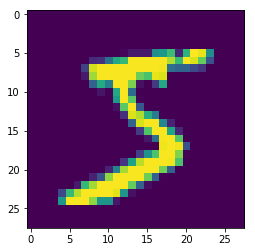

In [3]:
plt.imshow(x_train[0])

In [4]:
rcv.get_texture_measure(x_train[0], mtype='ASM')

/home/mara/venv/local/lib/python2.7/site-packages/skimage/feature/texture.py:109: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(image.dtype, np.float):


array([[0.56878219]])

In [5]:
rcv.get_all_texture_measures(x_train[0])

{'ASM': array([[0.56878219]]),
 'contrast': array([[1789.86243386]]),
 'correlation': array([[0.86298341]]),
 'dissimilarity': array([[14.71164021]]),
 'energy': array([[0.7541765]]),
 'homogeneity': array([[0.80615506]])}

In [6]:
import numpy as np
color_mnist_image = np.transpose(np.asarray([x_train[0]] *3),[1,2,0])

In [7]:
rcv.get_all_color_measures(color_mnist_image, verbose=False)

{'black': 0.8507653061224489,
 'blue': 0.0,
 'colorfulness': 0.0,
 'cyano': 0.0,
 'green': 0.0,
 'magenta': 0.0,
 'orange': 0.0,
 'purple': 0.0,
 'red': 0.0,
 'white': 0.1096938775510204,
 'yellow': 0.0}

In [11]:
# TO DO: compute measures on a masked area

# Compute the regression
Global Regression under the Euclidean space assumption

In [11]:
import keras
inceptionv3 = keras.applications.inception_v3.InceptionV3(include_top=True, weights=None, input_tensor=None, input_shape=(299,299,3), pooling=None, classes=10)

In [8]:
import requests
from io import BytesIO
import PIL.Image

url = 'https://cdn.hswstatic.com/gif/flowering-trees-1.jpg'
response = requests.get(url)
sample_img = PIL.Image.open(BytesIO(response.content))

In [9]:
resized_sample = sample_img.resize((229,299), PIL.Image.NEAREST)
print np.asarray(resized_sample).shape
input_sample = np.zeros((2, 299,299,3))

(299, 229, 3)


In [10]:
import rcv
reload(rcv)
from rcv import *

In [ ]:
get_batch_activations(inceptionv3, 'mixed10', input_sample)

In [12]:
batch = input_sample
get_layer_output = K.function([inceptionv3.layers[0].input],
                                  [inceptionv3.get_layer('mixed10').output])
feats = get_layer_output([batch])

ResourceExhaustedError: OOM when allocating tensor with shape[1,1,768,192] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: conv2d_50/random_uniform/RandomUniform = RandomUniform[T=DT_INT32, dtype=DT_FLOAT, seed=87654321, seed2=81308, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv2d_31/random_uniform/shape)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op u'conv2d_50/random_uniform/RandomUniform', defined at:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/mara/venv/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/mara/venv/local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/mara/venv/local/lib/python2.7/site-packages/tornado/ioloop.py", line 1064, in start
    handler_func(fd_obj, events)
  File "/home/mara/venv/local/lib/python2.7/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/mara/venv/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/mara/venv/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/mara/venv/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/mara/venv/local/lib/python2.7/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/mara/venv/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/mara/venv/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/mara/venv/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/mara/venv/local/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/mara/venv/local/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/mara/venv/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2714, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/mara/venv/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2818, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/mara/venv/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2878, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-13e49f3ba43f>", line 2, in <module>
    inceptionv3 = keras.applications.inception_v3.InceptionV3(include_top=True, weights=None, input_tensor=None, input_shape=(299,299,3), pooling=None, classes=10)
  File "/home/mara/venv/local/lib/python2.7/site-packages/keras/applications/inception_v3.py", line 283, in InceptionV3
    branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
  File "/home/mara/venv/local/lib/python2.7/site-packages/keras/applications/inception_v3.py", line 81, in conv2d_bn
    name=conv_name)(x)
  File "/home/mara/venv/local/lib/python2.7/site-packages/keras/engine/topology.py", line 592, in __call__
    self.build(input_shapes[0])
  File "/home/mara/venv/local/lib/python2.7/site-packages/keras/layers/convolutional.py", line 138, in build
    constraint=self.kernel_constraint)
  File "/home/mara/venv/local/lib/python2.7/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/home/mara/venv/local/lib/python2.7/site-packages/keras/engine/topology.py", line 413, in add_weight
    weight = K.variable(initializer(shape),
  File "/home/mara/venv/local/lib/python2.7/site-packages/keras/initializers.py", line 217, in __call__
    dtype=dtype, seed=self.seed)
  File "/home/mara/venv/local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py", line 3838, in random_uniform
    dtype=dtype, seed=seed)
  File "/home/mara/venv/local/lib/python2.7/site-packages/tensorflow/python/ops/random_ops.py", line 242, in random_uniform
    rnd = gen_random_ops.random_uniform(shape, dtype, seed=seed1, seed2=seed2)
  File "/home/mara/venv/local/lib/python2.7/site-packages/tensorflow/python/ops/gen_random_ops.py", line 674, in random_uniform
    name=name)
  File "/home/mara/venv/local/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/mara/venv/local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/home/mara/venv/local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[1,1,768,192] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: conv2d_50/random_uniform/RandomUniform = RandomUniform[T=DT_INT32, dtype=DT_FLOAT, seed=87654321, seed2=81308, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv2d_31/random_uniform/shape)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [13]:
input_sample.shape

(2, 299, 299, 3)

In [ ]:
get_activations(inceptionv3, 'mixed10', x_train)

# RCV improvements
Local Regression under the Euclidean space assumption

Learning the regression of concept measures is a wide data problem [1]: thousands, million of variables, but restricted number of samples(we'd like to keep it to hundreds).

[1] https://www.aistats.org/aistats2019/0-AISTATS2019-slides-robert_tibshirani.pdf

Let's start with a shallow MLP and a toy test maybe?

In [14]:
% matplotlib inline
import sklearn.datasets
import matplotlib.pyplot as plt
# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D


mpl_toolkits.mplot3d.axes3d.Axes3D

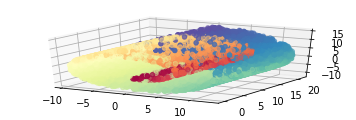

In [15]:
# 10K datapoints 
toy_data, color = sklearn.datasets.make_swiss_roll(n_samples=10000, noise=0.0, random_state=0)
fig = plt.figure()

ax = fig.add_subplot(211, projection='3d')
ax.scatter(toy_data[:, 0], toy_data[:, 1], toy_data[:, 2], c=color, cmap=plt.cm.Spectral)

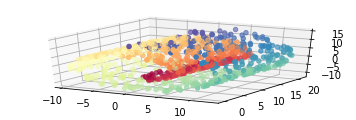

In [16]:
# 1K datapoints 
toy_data, color = sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.0, random_state=0)
fig = plt.figure()

ax = fig.add_subplot(211, projection='3d')
ax.scatter(toy_data[:, 0], toy_data[:, 1], toy_data[:, 2], c=color, cmap=plt.cm.Spectral)

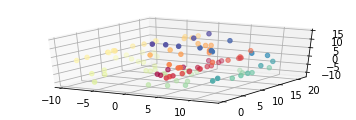

In [17]:
# 100 datapoints 
toy_data, color = sklearn.datasets.make_swiss_roll(n_samples=100, noise=0.0, random_state=0)
fig = plt.figure()

ax = fig.add_subplot(211, projection='3d')
ax.scatter(toy_data[:, 0], toy_data[:, 1], toy_data[:, 2], c=color, cmap=plt.cm.Spectral)

In [28]:
import rcv
reload(rcv)
rcv.get_rcv(toy_data, color, type='global linear', evaluation=True)

Global linear regression under euclidean assumption
Random state:  1
R2:  0.019775588138819522
MSE:  7.237055268808664
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.6456
Date:                Fri, 23 Aug 2019   Prob (F-statistic):              0.588
Time:                        10:58:42   Log-Likelihood:                -240.85
No. Observations:                 100   AIC:                             489.7
Df Residuals:                      96   BIC:                             500.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

In [38]:
import rcv
reload(rcv)
clustering_labels=rcv.get_rcv(toy_data, color, type='local linear')

Local linear regression under Euclidean assumption
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


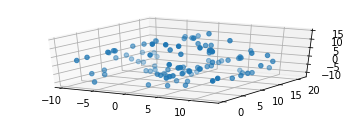

In [39]:
# 100 datapoints 
fig = plt.figure()

ax = fig.add_subplot(211, projection='3d')
ax.scatter(toy_data[:, 0], toy_data[:, 1], toy_data[:, 2], c=clustering_labels, cmap=plt.cm.Spectral)